In [1]:
#파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

Saving jhj.csv to jhj.csv
Saving jhj_av.csv to jhj_av.csv
Saving pyj.csv to pyj.csv
Saving pyj_av.csv to pyj_av.csv
Saving yez0218.csv to yez0218.csv
Saving yez0218_av.csv to yez0218_av.csv


In [2]:
import pandas as pd     # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import numpy as np      # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import statsmodels.api as sm         # 통계기법 활용 라이브러리
from sklearn.model_selection import train_test_split     # 훈련 데이터, 테스트 데이터 분리

In [3]:
df1 = pd.read_csv('jhj.csv', header = 0)        # csv파일 불러오기, header로 지정할 행 번호적기(여기부터 파일을 읽어옴)
df2 = pd.read_csv('yez0218.csv', header = 0)    # df=dataframe
df3 = pd.read_csv('pyj.csv', header = 0)

col_names = ['LUNG_LEFT', 'PERICARDIUM_LEFT', 'HEART_LEFT', 'LIVER_LEFT',
       'SPLEEN_LEFT', 'STOMACH_LEFT', 'TRIPLEFOCUS_LEFT',
       'SMALL_INTESTINE_LEFT', 'LARGE_INTESTINE_LEFT', 'GALLBLADDER_LEFT',
       'BLADDER_LEFT', 'KIDNEY_LEFT', 'LUNG_RIGHT', 'PERICARDIUM_RIGHT',
       'HEART_RIGHT', 'LIVER_RIGHT', 'SPLEEN_RIGHT', 'STOMACH_RIGHT',
       'TRIPLE_FOCUS_RIGHT', 'SMALL_INTESTINE_RIGHT', 'LARGE_INTESTINE_RIGHT',
       'GALLBLADDER_RIGHT', 'BLADDER_RIGHT', 'KIDNEY_RIGHT']

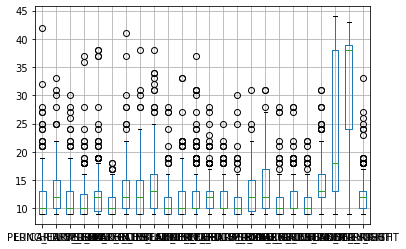

In [4]:
df1.boxplot(column=col_names)

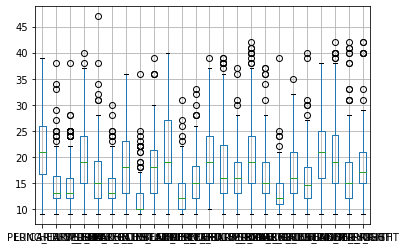

In [5]:
df2.boxplot(column=col_names)

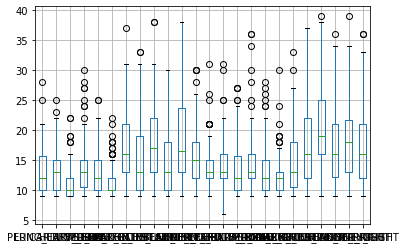

In [6]:
df3.boxplot(column=col_names)

In [7]:
Q3 = df1.quantile(0.75)      # 사분위수의 상위 75% 지점
Q1 = df1.quantile(0.25)      # 사분위수의 상위 25% 지점

IQR = Q3 - Q1                # 박스수치(Interquartile range)

def is_outlier(df1):
    col = df1[col_name]
    if col > Q3[col_name] + 1.5 * IQR[col_name] or col < Q1[col_name] - 1.5 * IQR[col_name]:    # 범위 밖의 값이 나오면 이상치 1로 return
        return 1
    else:
        return 0
for col_name in col_names:
    df1[col_name+' 이상치여부'] = df1.apply(is_outlier, axis = 1) # axis = 1 지정 필수
df1

,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,GALLBLADDER_LEFT,...,HEART_RIGHT 이상치여부,LIVER_RIGHT 이상치여부,SPLEEN_RIGHT 이상치여부,STOMACH_RIGHT 이상치여부,TRIPLE_FOCUS_RIGHT 이상치여부,SMALL_INTESTINE_RIGHT 이상치여부,LARGE_INTESTINE_RIGHT 이상치여부,GALLBLADDER_RIGHT 이상치여부,BLADDER_RIGHT 이상치여부,KIDNEY_RIGHT 이상치여부
0,9,9,9,9,9,9,10,13,12,9,...,0,0,0,0,0,0,0,0,0,0
1,12,10,9,10,9,10,13,10,19,9,...,0,0,0,0,0,0,0,0,0,0
2,19,10,9,10,15,9,13,9,12,9,...,0,0,0,0,1,0,0,0,0,0
3,12,10,9,13,9,12,10,12,10,9,...,0,0,0,0,0,0,0,0,0,0
4,10,9,9,10,15,9,9,9,12,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,13,10,10,10,37,9,10,9,12,15,...,0,0,0,0,0,0,0,0,0,0
223,10,9,9,9,10,10,10,15,10,9,...,0,0,0,0,0,0,0,0,0,0
224,12,21,12,12,18,12,18,12,12,10,...,1,0,0,0,1,0,0,0,0,0
225,22,13,9,10,9,13,16,12,12,10,...,0,0,0,0,0,0,0,0,0,0


In [8]:
IQR_df1 = df1[(df1[col_name] <= Q3[col_name]+1.5*IQR[col_name]) & (df1[col_name] >= Q1[col_name]-1.5*IQR[col_name])]
for col_name in col_names:
    IQR_df1 = IQR_df1[(IQR_df1[col_name] <= Q3[col_name]+1.5*IQR[col_name]) & (IQR_df1[col_name] >= Q1[col_name]-1.5*IQR[col_name])]
    IQR_df1 = IQR_df1[col_names]

print("=====df1=====")
print('original_df :', len(df1))
print('IQR_df :', len(IQR_df1))

=====df1=====
original_df : 227
IQR_df : 103


In [9]:
Q3 = df2.quantile(0.75)
Q1 = df2.quantile(0.25)

IQR = Q3 - Q1

def is_outlier(df2):
    col = df2[col_name]
    if col > Q3[col_name] + 1.5 * IQR[col_name] or col < Q1[col_name] - 1.5 * IQR[col_name]:
        return 1
    else:
        return 0
for col_name in col_names:
    df2[col_name+' 이상치여부'] = df2.apply(is_outlier, axis = 1) # axis = 1 지정 필수
df2

,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,GALLBLADDER_LEFT,...,HEART_RIGHT 이상치여부,LIVER_RIGHT 이상치여부,SPLEEN_RIGHT 이상치여부,STOMACH_RIGHT 이상치여부,TRIPLE_FOCUS_RIGHT 이상치여부,SMALL_INTESTINE_RIGHT 이상치여부,LARGE_INTESTINE_RIGHT 이상치여부,GALLBLADDER_RIGHT 이상치여부,BLADDER_RIGHT 이상치여부,KIDNEY_RIGHT 이상치여부
0,12,9,9,10,12,9,15,9,12,10,...,0,0,0,0,0,0,0,0,0,0
1,13,15,9,12,9,9,12,10,13,9,...,0,0,0,0,0,0,0,0,0,0
2,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,0,0,0,0
3,28,15,10,12,19,9,29,13,21,25,...,0,0,0,0,0,0,0,0,0,0
4,29,21,13,11,13,9,31,16,17,21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,26,10,12,19,12,10,13,12,18,12,...,0,0,0,0,0,0,0,0,0,0
176,19,13,13,16,12,13,13,10,13,13,...,0,0,0,0,0,0,0,0,0,0
177,21,10,10,21,12,10,12,9,19,16,...,0,0,0,0,0,0,0,0,0,0
178,18,10,10,12,10,13,12,9,12,10,...,0,0,0,0,0,0,0,0,0,0


In [10]:
IQR_df2 = df2[(df2[col_name] <= Q3[col_name]+1.5*IQR[col_name]) & (df2[col_name] >= Q1[col_name]-1.5*IQR[col_name])]
for col_name in col_names:
    IQR_df2 = IQR_df2[(IQR_df2[col_name] <= Q3[col_name]+1.5*IQR[col_name]) & (IQR_df2[col_name] >= Q1[col_name]-1.5*IQR[col_name])]
    IQR_df2 = IQR_df2[col_names]

print("=====df2=====")
print('original_df :', len(df2))
print('IQR_df :', len(IQR_df2))

=====df2=====
original_df : 180
IQR_df : 119


In [11]:
Q3 = df3.quantile(0.75)
Q1 = df3.quantile(0.25)

IQR = Q3 - Q1

def is_outlier(df3):
    col = df3[col_name]
    if col > Q3[col_name] + 1.5 * IQR[col_name] or col < Q1[col_name] - 1.5 * IQR[col_name]:
        return 1
    else:
        return 0
for col_name in col_names:
    df3[col_name+' 이상치여부'] = df3.apply(is_outlier, axis = 1) # axis = 1 지정 필수
df3

,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,GALLBLADDER_LEFT,...,HEART_RIGHT 이상치여부,LIVER_RIGHT 이상치여부,SPLEEN_RIGHT 이상치여부,STOMACH_RIGHT 이상치여부,TRIPLE_FOCUS_RIGHT 이상치여부,SMALL_INTESTINE_RIGHT 이상치여부,LARGE_INTESTINE_RIGHT 이상치여부,GALLBLADDER_RIGHT 이상치여부,BLADDER_RIGHT 이상치여부,KIDNEY_RIGHT 이상치여부
0,18,12,12,15,16,12,18,15,24,16,...,0,0,0,0,0,0,0,0,0,0
1,18,10,10,12,16,13,25,18,9,24,...,0,1,0,0,0,0,0,0,0,0
2,15,12,12,12,12,12,19,10,21,18,...,0,0,0,0,0,0,0,0,0,0
3,12,15,10,16,12,17,24,31,25,22,...,0,0,0,1,0,0,0,0,0,0
4,16,13,10,13,13,10,24,22,25,21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,19,21,12,13,12,13,19,13,12,13,...,0,0,0,0,0,0,0,0,0,0
110,18,9,12,15,10,10,13,12,13,10,...,1,0,0,1,0,0,0,0,0,0
111,9,10,15,15,10,9,10,9,13,12,...,0,0,0,0,0,0,0,0,0,0
112,12,10,16,12,13,9,15,10,15,10,...,0,0,0,0,0,0,0,0,0,0


In [12]:
IQR_df3 = df3[(df3[col_name] <= Q3[col_name]+1.5*IQR[col_name]) & (df3[col_name] >= Q1[col_name]-1.5*IQR[col_name])]
for col_name in col_names:
    IQR_df3 = IQR_df3[(IQR_df3[col_name] <= Q3[col_name]+1.5*IQR[col_name]) & (IQR_df3[col_name] >= Q1[col_name]-1.5*IQR[col_name])]
    IQR_df3 = IQR_df3[col_names]

print("=====df3=====")
print('original_df :', len(df3))
print('IQR_df :', len(IQR_df3))

=====df3=====
original_df : 114
IQR_df : 68


In [13]:
df1 = IQR_df1
df1['type']='토양'
df1.insert(0, 'id', 'jhj')
df1

,id,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,...,LIVER_RIGHT,SPLEEN_RIGHT,STOMACH_RIGHT,TRIPLE_FOCUS_RIGHT,SMALL_INTESTINE_RIGHT,LARGE_INTESTINE_RIGHT,GALLBLADDER_RIGHT,BLADDER_RIGHT,KIDNEY_RIGHT,type
0,jhj,9,9,9,9,9,9,10,13,12,...,9,9,10,9,10,10,10,9,9,토양
1,jhj,12,10,9,10,9,10,13,10,19,...,9,10,10,9,9,12,10,21,12,토양
3,jhj,12,10,9,13,9,12,10,12,10,...,9,15,10,12,9,12,18,10,12,토양
4,jhj,10,9,9,10,15,9,9,9,12,...,9,10,9,13,9,13,21,9,15,토양
5,jhj,9,10,9,10,10,9,12,13,13,...,12,10,9,13,9,15,17,15,15,토양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,jhj,9,16,9,12,13,10,10,9,19,...,13,15,12,13,9,16,40,41,9,토양
216,jhj,10,9,12,13,12,9,12,12,15,...,22,9,10,12,10,9,9,10,10,토양
217,jhj,9,9,12,9,9,9,12,12,16,...,13,12,13,15,9,10,12,10,13,토양
220,jhj,9,13,9,10,18,9,9,10,10,...,10,10,10,12,9,13,9,40,9,토양


In [14]:
df2 = IQR_df2
df2['type']='수양'
df2.insert(0, 'id', 'yez0218')
df2

,id,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,...,LIVER_RIGHT,SPLEEN_RIGHT,STOMACH_RIGHT,TRIPLE_FOCUS_RIGHT,SMALL_INTESTINE_RIGHT,LARGE_INTESTINE_RIGHT,GALLBLADDER_RIGHT,BLADDER_RIGHT,KIDNEY_RIGHT,type
0,yez0218,12,9,9,10,12,9,15,9,12,...,10,9,9,17,9,10,9,10,12,수양
1,yez0218,13,15,9,12,9,9,12,10,13,...,15,12,9,13,13,13,10,20,13,수양
2,yez0218,9,9,9,9,9,9,9,9,9,...,12,9,9,9,10,12,9,13,10,수양
3,yez0218,28,15,10,12,19,9,29,13,21,...,14,14,14,15,24,25,29,9,12,수양
4,yez0218,29,21,13,11,13,9,31,16,17,...,12,12,12,12,19,20,20,16,12,수양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,yez0218,26,10,12,19,12,10,13,12,18,...,16,15,12,22,15,19,16,9,24,수양
176,yez0218,19,13,13,16,12,13,13,10,13,...,19,13,13,16,12,12,12,10,21,수양
177,yez0218,21,10,10,21,12,10,12,9,19,...,15,13,15,23,10,19,13,9,16,수양
178,yez0218,18,10,10,12,10,13,12,9,12,...,17,10,15,18,9,22,16,9,15,수양


In [15]:
df3 = IQR_df3
df3['type']='수양'
df3.insert(0, 'id', 'pyj')
df3

,id,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,...,LIVER_RIGHT,SPLEEN_RIGHT,STOMACH_RIGHT,TRIPLE_FOCUS_RIGHT,SMALL_INTESTINE_RIGHT,LARGE_INTESTINE_RIGHT,GALLBLADDER_RIGHT,BLADDER_RIGHT,KIDNEY_RIGHT,type
0,pyj,18,12,12,15,16,12,18,15,24,...,13,15,13,19,25,24,19,19,18,수양
4,pyj,16,13,10,13,13,10,24,22,25,...,16,15,13,15,27,15,17,15,18,수양
5,pyj,9,17,10,19,15,10,21,19,26,...,15,18,12,19,19,30,25,23,18,수양
9,pyj,21,13,9,15,13,10,21,12,13,...,21,12,12,12,13,22,13,21,15,수양
10,pyj,12,12,10,10,12,10,15,16,21,...,13,12,10,13,15,13,15,22,15,수양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,pyj,9,15,9,9,12,10,12,9,10,...,9,10,10,9,12,9,9,10,9,수양
109,pyj,19,21,12,13,12,13,19,13,12,...,12,10,13,12,12,28,13,16,16,수양
111,pyj,9,10,15,15,10,9,10,9,13,...,13,9,10,10,10,12,13,9,12,수양
112,pyj,12,10,16,12,13,9,15,10,15,...,13,13,10,13,15,18,10,10,16,수양


In [ ]:
# 이상치 제거한 값들만 파일로 뽑기

df1.to_csv("jhj_dp.csv", index = False)
df2.to_csv("yez0218_dp.csv", index = False)
df3.to_csv("pyj_dp.csv", index = False)

In [16]:
df = pd.concat([df1, df2, df3])     # 열 방향 병합
df

,id,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,...,LIVER_RIGHT,SPLEEN_RIGHT,STOMACH_RIGHT,TRIPLE_FOCUS_RIGHT,SMALL_INTESTINE_RIGHT,LARGE_INTESTINE_RIGHT,GALLBLADDER_RIGHT,BLADDER_RIGHT,KIDNEY_RIGHT,type
0,jhj,9,9,9,9,9,9,10,13,12,...,9,9,10,9,10,10,10,9,9,토양
1,jhj,12,10,9,10,9,10,13,10,19,...,9,10,10,9,9,12,10,21,12,토양
3,jhj,12,10,9,13,9,12,10,12,10,...,9,15,10,12,9,12,18,10,12,토양
4,jhj,10,9,9,10,15,9,9,9,12,...,9,10,9,13,9,13,21,9,15,토양
5,jhj,9,10,9,10,10,9,12,13,13,...,12,10,9,13,9,15,17,15,15,토양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,pyj,9,15,9,9,12,10,12,9,10,...,9,10,10,9,12,9,9,10,9,수양
109,pyj,19,21,12,13,12,13,19,13,12,...,12,10,13,12,12,28,13,16,16,수양
111,pyj,9,10,15,15,10,9,10,9,13,...,13,9,10,10,10,12,13,9,12,수양
112,pyj,12,10,16,12,13,9,15,10,15,...,13,13,10,13,15,18,10,10,16,수양


In [17]:
df = df.drop(['id'], axis=1)      # 아이디행 제거
df

,LUNG_LEFT,PERICARDIUM_LEFT,HEART_LEFT,LIVER_LEFT,SPLEEN_LEFT,STOMACH_LEFT,TRIPLEFOCUS_LEFT,SMALL_INTESTINE_LEFT,LARGE_INTESTINE_LEFT,GALLBLADDER_LEFT,...,LIVER_RIGHT,SPLEEN_RIGHT,STOMACH_RIGHT,TRIPLE_FOCUS_RIGHT,SMALL_INTESTINE_RIGHT,LARGE_INTESTINE_RIGHT,GALLBLADDER_RIGHT,BLADDER_RIGHT,KIDNEY_RIGHT,type
0,9,9,9,9,9,9,10,13,12,9,...,9,9,10,9,10,10,10,9,9,토양
1,12,10,9,10,9,10,13,10,19,9,...,9,10,10,9,9,12,10,21,12,토양
3,12,10,9,13,9,12,10,12,10,9,...,9,15,10,12,9,12,18,10,12,토양
4,10,9,9,10,15,9,9,9,12,9,...,9,10,9,13,9,13,21,9,15,토양
5,9,10,9,10,10,9,12,13,13,9,...,12,10,9,13,9,15,17,15,15,토양
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,9,15,9,9,12,10,12,9,10,9,...,9,10,10,9,12,9,9,10,9,수양
109,19,21,12,13,12,13,19,13,12,13,...,12,10,13,12,12,28,13,16,16,수양
111,9,10,15,15,10,9,10,9,13,12,...,13,9,10,10,10,12,13,9,12,수양
112,12,10,16,12,13,9,15,10,15,10,...,13,13,10,13,15,18,10,10,16,수양


In [18]:
mapping_dict = { 
    '목양': 1,
    '목음': 2,
    '금양': 3,
    '금음': 4,
    '수양': 5,
    '수음': 6,
    '토양': 7
}
after_mapping_target = df['type'].apply(lambda x : mapping_dict[x])   # lambda 사용해서 숫자로 바꿈
after_mapping_target

0      7
1      7
3      7
4      7
5      7
      ..
107    5
109    5
111    5
112    5
113    5
Name: type, Length: 290, dtype: int64

In [ ]:
#------------ 평균낸 값(소수 첫째자리에서 반올림)으로 테스트 파일 추가 --------------------

In [19]:
df4 = pd.read_csv('jhj_av.csv', header = 0)  
df5 = pd.read_csv('yez0218_av.csv', header = 0)
df6 = pd.read_csv('pyj_av.csv', header = 0)

col_names = ['LUNG_LEFT', 'PERICARDIUM_LEFT', 'HEART_LEFT', 'LIVER_LEFT',
       'SPLEEN_LEFT', 'STOMACH_LEFT', 'TRIPLEFOCUS_LEFT',
       'SMALL_INTESTINE_LEFT', 'LARGE_INTESTINE_LEFT', 'GALLBLADDER_LEFT',
       'BLADDER_LEFT', 'KIDNEY_LEFT', 'LUNG_RIGHT', 'PERICARDIUM_RIGHT',
       'HEART_RIGHT', 'LIVER_RIGHT', 'SPLEEN_RIGHT', 'STOMACH_RIGHT',
       'TRIPLE_FOCUS_RIGHT', 'SMALL_INTESTINE_RIGHT', 'LARGE_INTESTINE_RIGHT',
       'GALLBLADDER_RIGHT', 'BLADDER_RIGHT', 'KIDNEY_RIGHT']


df4['type']='토양'
df5['type']='수양'
df6['type']='수양'

In [ ]:
#--------------------jhj테스트-----------------

In [20]:
mapping_dict = { 
    '목양': 1,
    '목음': 2,
    '금양': 3,
    '금음': 4,
    '수양': 5,
    '수음': 6,
    '토양': 7
}
mapping_target1 = df4['type'].apply(lambda x : mapping_dict[x])
mapping_target1

0    7
Name: type, dtype: int64

In [21]:
# features/target, train/test dataset 분리

X = df[col_names]
y = after_mapping_target
a = df4[col_names]
b = mapping_target1

train_x = X
train_y = y
test_x = a
test_y = b

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(290, 24) (1, 24) (290,) (1,)


In [22]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)
print(accuracy_score(test_y,predict1))
predict1

1.0


array([7])

In [ ]:
#--------------------yez0218테스트-----------------

In [23]:
mapping_dict = { 
    '목양': 1,
    '목음': 2,
    '금양': 3,
    '금음': 4,
    '수양': 5,
    '수음': 6,
    '토양': 7
}
mapping_target2 = df5['type'].apply(lambda x : mapping_dict[x])
mapping_target2

0    5
Name: type, dtype: int64

In [24]:
# features/target, train/test dataset 분리

X = df[col_names]
y = after_mapping_target
a = df5[col_names]
b = mapping_target2

train_x = X
train_y = y
test_x = a
test_y = b

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(290, 24) (1, 24) (290,) (1,)


In [25]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict2 = clf.predict(test_x)
print(accuracy_score(test_y,predict2))
predict2

1.0


array([5])

In [ ]:
#--------------------pyj테스트-----------------

In [26]:
mapping_dict = { 
    '목양': 1,
    '목음': 2,
    '금양': 3,
    '금음': 4,
    '수양': 5,
    '수음': 6,
    '토양': 7
}
mapping_target3 = df6['type'].apply(lambda x : mapping_dict[x])
mapping_target3

0    5
Name: type, dtype: int64

In [27]:
# features/target, train/test dataset 분리

X = df[col_names]
y = after_mapping_target
a = df6[col_names]
b = mapping_target3

train_x = X
train_y = y
test_x = a
test_y = b

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(290, 24) (1, 24) (290,) (1,)


In [28]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict3 = clf.predict(test_x)
print(accuracy_score(test_y,predict3))
predict3

1.0


array([5])